In [1]:
%matplotlib inline

#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#read csv file into dataframe
recent_grads = pd.read_csv("recent-grads.csv")

#taking a brief look at the dataframe
print(recent_grads.head())
recent_grads.columns

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [2]:
#descriptive stats on dataset
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Other than the values in 'Major' and 'Major_category' columns, all the values are numerical in this dataset.

In [3]:
#Dropping any rows with null values
raw_data_count = len(recent_grads)
print(raw_data_count)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

173
172


We can see that a single row has null values. This row will be dropped for the analysis. Now we'll explore relationships between variables using scatter plots.

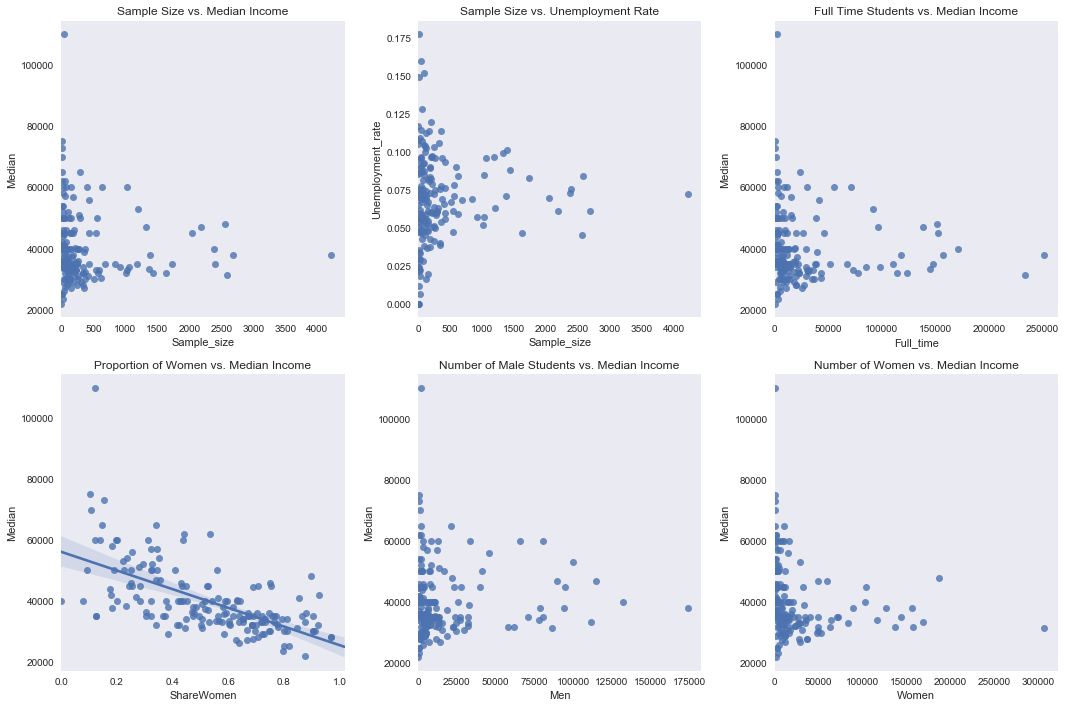

In [4]:
#dark setting for graphs
sns.set(style="dark")

#column titles in dataframe
x = ['Sample_size', 'Sample_size', 'Full_time', 'ShareWomen', 'Men', 'Women']
#title for graphs
titles = ['Sample Size vs. Median Income', 'Sample Size vs. Unemployment Rate', 
                 'Full Time Students vs. Median Income', 'Proportion of Women vs. Median Income',
                 'Number of Male Students vs. Median Income', 'Number of Women vs. Median Income']

fig = plt.figure(figsize=(15,10))
for i in range(6): #looping six times to create six graphs
    ax = fig.add_subplot(2,3,i+1)
    if i == 1: #placing the scatter plot of x[i] and unemployment rate at top-middle
        ax = sns.regplot(x=x[i], y='Unemployment_rate', data=recent_grads, 
                  fit_reg=False)
    elif x[i] == 'ShareWomen':
        ax = sns.regplot(x=x[i], y='Median', data=recent_grads)
    else: #other scatter plots are of x[i] and Median Income
        ax = sns.regplot(x=x[i], y='Median', data=recent_grads, 
                  fit_reg=False)
    ax.set_title(titles[i])    
    ax.set_xlim(left=0) #making sure x axis starts from 0
plt.tight_layout()

Some interesting patterns can bee seen in these charts.

1) It appears that students enrolled in popular majors do not make more money than their peers. The charts with y-axis depicting median earnings of full-time, year-round students and x-axis depicting multiple variables like number of male, female and total graduates show similar patterns. There is a lot of variability among programs when they have lower number of students. As the number of students incrase, the range between high median income and low median income decreases with the overall range decreasing to lower incomes.

2) Sample size vs. unemployment rate shows a similar pattern as the ones mentioned in 1).

3) There appears to be a moderate negative relationship between the proportion of female graduates and median income. It looks like students majored in subjects that are majority female make less money than the ones majored in subjects that have less female students.

Now let's take a look at the distribution of values in different columns.

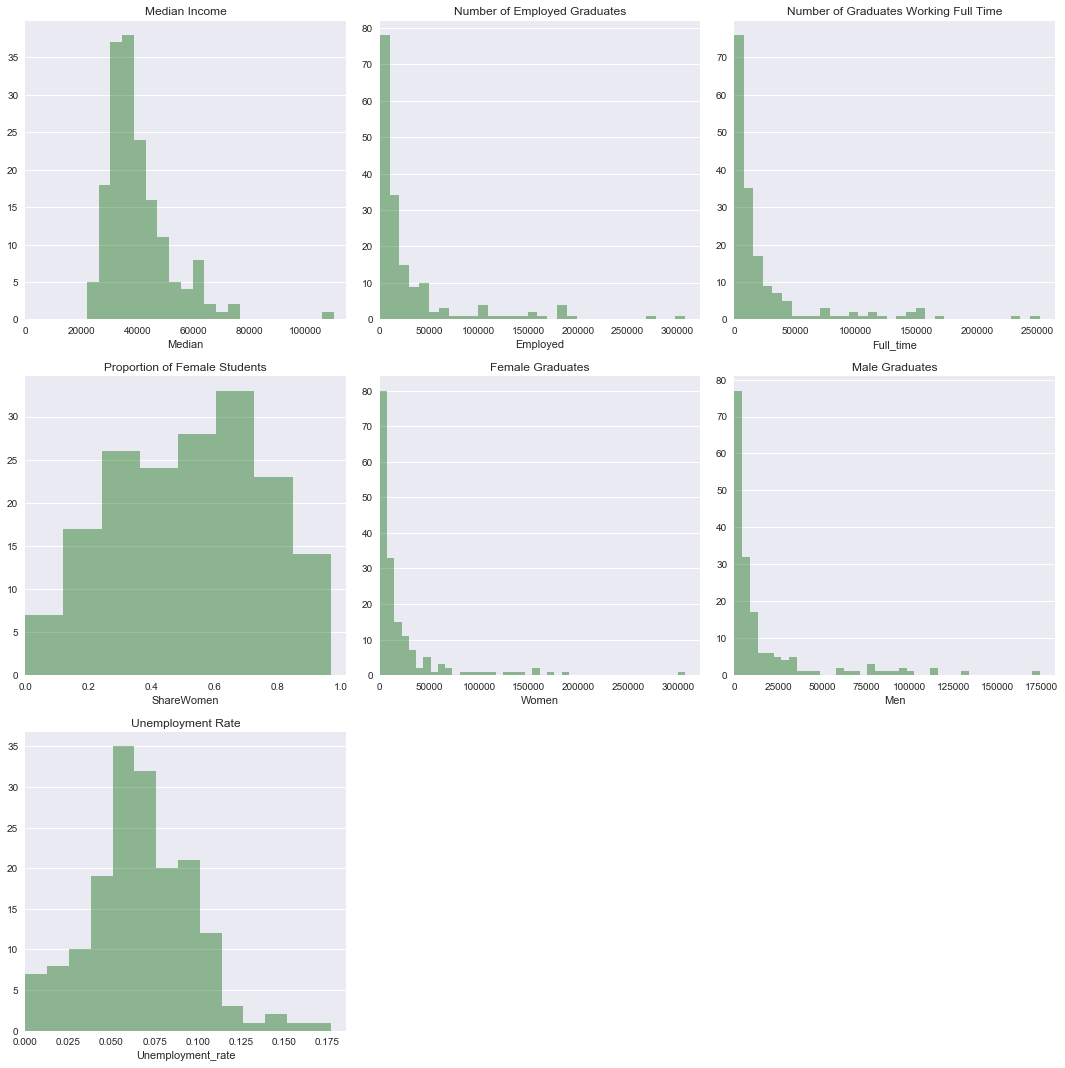

In [13]:
#columns that will be analyzed
columns = ["Median", "Employed", "Full_time", 
           "ShareWomen", "Women", "Men", "Unemployment_rate"]
titles = ["Median Income", "Number of Employed Graduates", 
                 "Number of Graduates Working Full Time", 
                 "Proportion of Female Students",
                "Female Graduates", "Male Graduates", "Unemployment Rate"]

fig = plt.figure(figsize=(15,15))

for i in range(7): #looping through to create 7 plots
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.distplot(recent_grads[columns[i]], kde=False, color='darkgreen')
    ax.set_title(titles[i])
    ax.set_xlim(left=0)
    ax.yaxis.grid(True) #putting in horizontal grid for ease of visualizing the plots
plt.tight_layout()

Findings from this set of histograms:

1) Vast majority of programs had median incomes that ranged from 20000 USD to 50000 USD. 

2) The amount of female graduates are larger than the amount of male graduates. Both populations have a similar pattern, where the majority of programs have lower amount of graduates. This pattern is also seen among variables in the Full_time and Employed columns. 

3) Most of the programs had students that were predominantly female. 

4) Vast majority of programs had unemployment rate ranging from 0% to 10%.

We will now look use scatter matrix plots to analyze both distribution and frequency of individual comlumns.

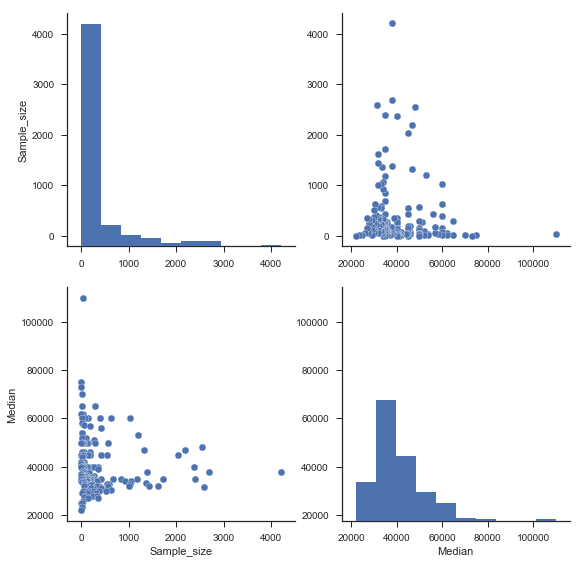

In [6]:
sns.set(style="ticks")
sns.pairplot(recent_grads[['Sample_size', 'Median']], size=4)#scatter matrix plot for sample size and median income

There aren't any relationships between sample size and median income. Sample size distribution mirrors the distributions identified in the previous kernel for number of employed graduates, number of graduates who are employed full time, number of male graduates and number of female students. 

Let's make a larger scatter matrix plot.

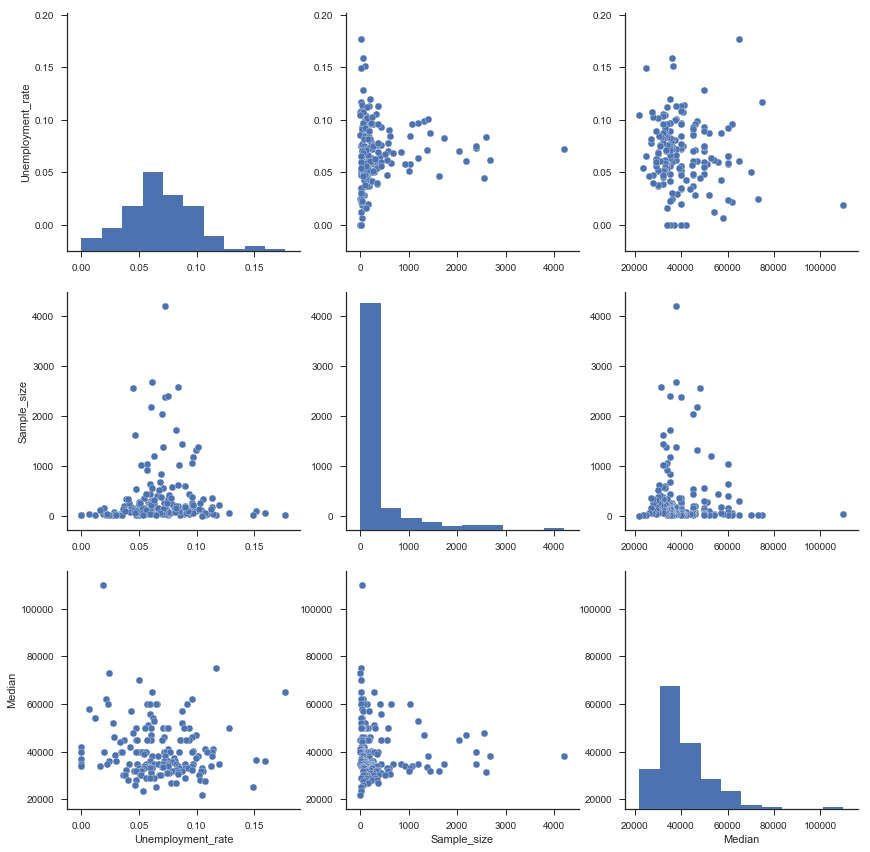

In [7]:
sns.pairplot(recent_grads[['Unemployment_rate', 
                           'Sample_size', 'Median']], size=4)

The only relationship that can be seen here exists between median income and unemployment rate, and it's a very weak one. Let's see how strong it is.

In [14]:
from scipy.stats.stats import pearsonr

pearsonr(recent_grads['Unemployment_rate'], recent_grads['Median'])

(-0.11576904957838358, 0.13045368361015916)

Correlation coefficient is -0.1; therefore, there is no relationship between unemployment rate and median income.

Next, we will compare proportion of female students from 10 majors with the lowest median income with 10 majors with the highest median income.

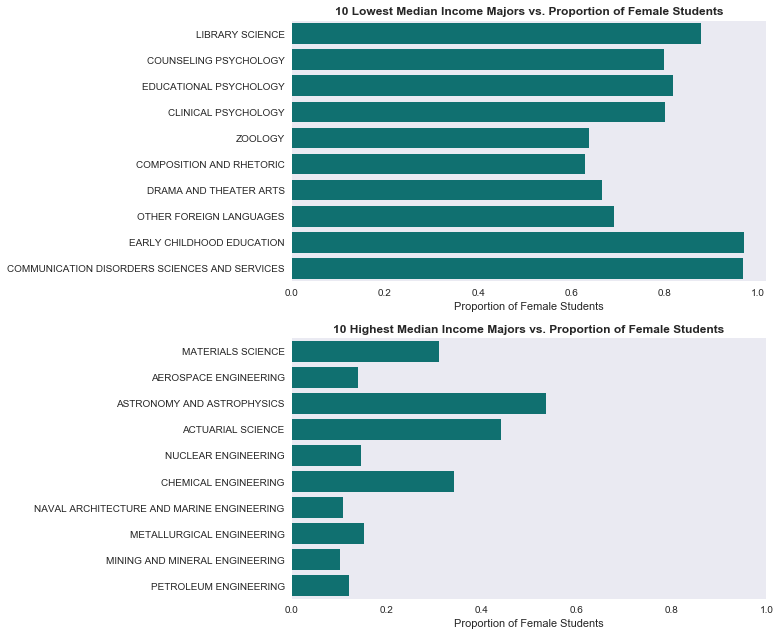

In [8]:
recent_grads_sorted = recent_grads.sort_values(by=['Median'])
sns.set(style='dark')
fig, (ax1, ax2) = plt.subplots(2, figsize=(11,9))
sns.barplot(x='ShareWomen',y='Major', 
                   data=recent_grads_sorted.head(10),
                   orient='h', color='teal', ax=ax1)
ax1.set(ylabel='', xlabel='Proportion of Female Students') 
ax1.set_title('10 Lowest Median Income Majors vs. Proportion of Female Students', fontweight='bold')
sns.barplot(x='ShareWomen',y='Major', 
                   data=recent_grads_sorted.tail(n=10),
                   orient='h', color='teal', ax=ax2)
ax2.set(ylabel='', xlabel='Proportion of Female Students') 
ax2.set_title('10 Highest Median Income Majors vs. Proportion of Female Students', fontweight='bold')
ax2.set_xlim(0,1)
plt.tight_layout()

Majors with the highest median income have significantly less proportion of female students than the majors with the lowest median income. Let's compare these majors for unemployment rate.

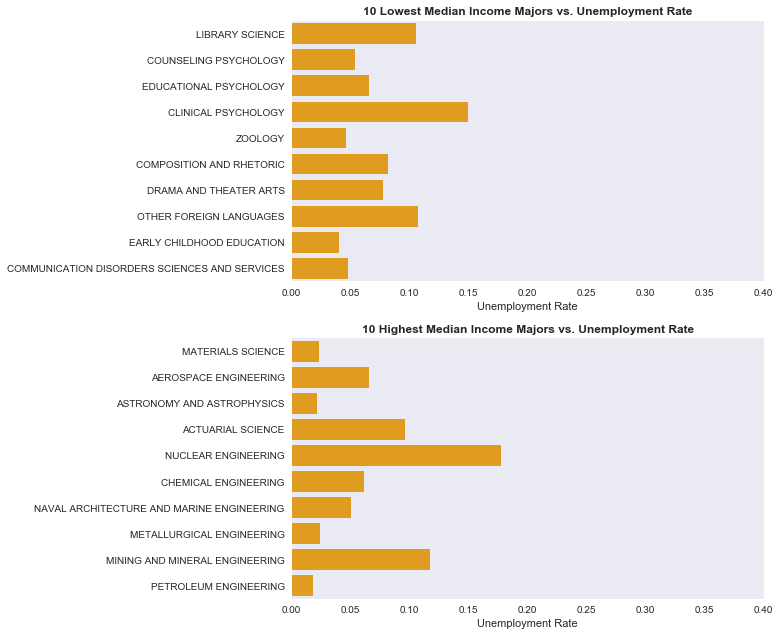

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(11,9))
sns.barplot(x='Unemployment_rate',y='Major', 
                   data=recent_grads_sorted.head(10),
                   orient='h', color='orange', ax=ax1)
ax1.set(ylabel='', xlabel='Unemployment Rate') 
ax1.set_title('10 Lowest Median Income Majors vs. Unemployment Rate', fontweight='bold')
ax1.set_xlim(0,0.4)
sns.barplot(x='Unemployment_rate',y='Major', 
                   data=recent_grads_sorted.tail(n=10),
                   orient='h', color='orange', ax=ax2)
ax2.set(ylabel='', xlabel='Unemployment Rate') 
ax2.set_title('10 Highest Median Income Majors vs. Unemployment Rate', fontweight='bold')
ax2.set_xlim(0,0.4)
plt.tight_layout()

Contrary to the previous analysis, there doesn't appear to be a significant difference in unemployment rates between the two groups. In fact, Nuclear Engineering, which is a part of top 10 majors with the highest median income, has the highest unemployment rate among the two groups.

Now moving onto creating boxplots of major groups with unemployment rate and median income.

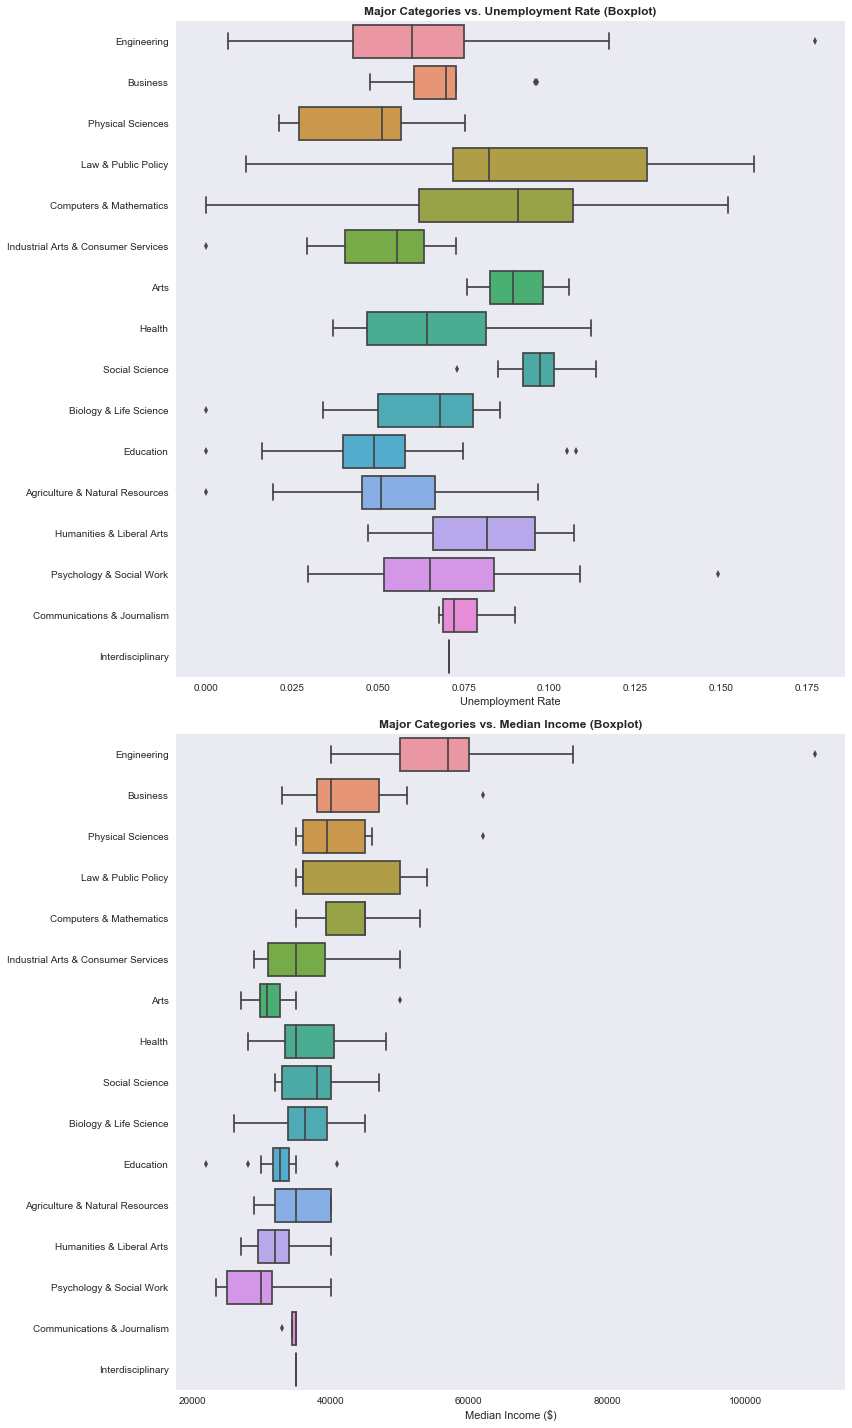

In [15]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,20)) #two subplot sections
sns.boxplot(y='Major_category', x='Unemployment_rate', data=recent_grads, ax=ax1)
ax1.set(ylabel='', xlabel='Unemployment Rate') #set labels
ax1.set_title('Major Categories vs. Unemployment Rate (Boxplot)', fontweight='bold')
sns.boxplot(y='Major_category', x='Median', data=recent_grads, ax=ax2)
ax2.set(ylabel='', xlabel='Median Income ($)')
ax2.set_title('Major Categories vs. Median Income (Boxplot)', fontweight='bold')
plt.tight_layout()

1) Largest range of unemployment rate came from Engineering, Law and Public Policy, and Computers and Mathematics majors.
2) Highest median unemployment rate came from Social Science.
3) Largest range of median income and highest median income was in Engineering majors.
4) Lowest median income was in Arts.

Lastly, let's take a look at the average number of male and female students in different major categories.

Text(0.5,1,'Average Number of Male and Female Students in Different Major Categories')

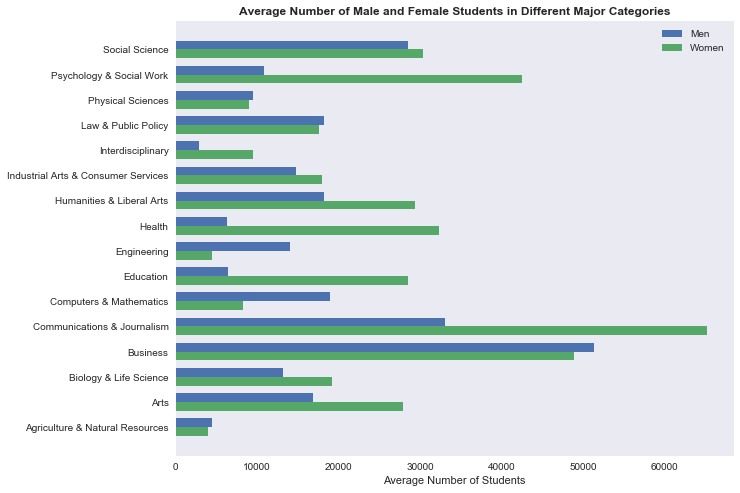

In [12]:
fig, ax = plt.subplots(figsize=(10,8))#setting up size

major_cat_len = len(recent_grads['Major_category'].value_counts())
recent_grads_grouped = recent_grads.groupby(by='Major_category').mean()
width = 0.35 
ind = np.arange(major_cat_len) #x index locations

#plotting male and female side by side
plot_1 = ax.barh(ind+width/2, recent_grads_grouped['Men'], width)
plot_2 = ax.barh(ind-width/2, recent_grads_grouped['Women'], width)

#labels and ticks
ax.set(yticks=ind, yticklabels=recent_grads_grouped.index, xlabel='Average Number of Students')

#legend
ax.legend((plot_1, plot_2), ('Men', 'Women'))

#title
ax.set_title('Average Number of Male and Female Students in Different Major Categories',
            fontweight='bold')

It looks like the total average number of students are largest in Business, Communiations & Journalism, Psychology & Social Work and Social Science. 

Biggest difference in male and female students can be observed in Communication & Journalism, Education, Computers & Mathematics, Egineering, Health and Psychology & Social Work.